In [1]:
### 데이터 생성하기
import pandas as pd
import numpy as np
perch_length= np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input , train_target, test_target = train_test_split(perch_length,perch_weight,test_size = 0.25,random_state = 42)
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [3]:
train_input = train_input.reshape(-1,1)
train_target = train_target.reshape(-1,1)
test_input= test_input.reshape(-1,1)
test_target = test_target.reshape(-1,1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input,train_target)
test_prediction = knr.predict(test_input)
print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.9746459963987609
0.9804899950518966


In [5]:
### 타깃값과 예측값 간의 오차를 확인하는 라이브러리 불러들이기
from sklearn.metrics import mean_absolute_error
### 오차값은 : 테스트 데이터에 대한 평균 절대값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
mae

35.42380952380951

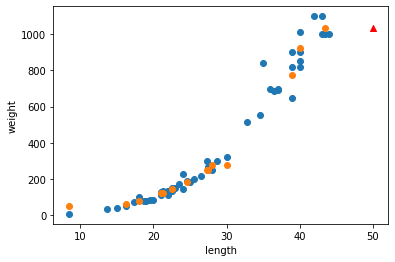

In [6]:
### 예측데이터 : 50
### - 산점도로 시각화 : 훈련데이터와 예측데이터, 이웃데이터 포함
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.scatter(test_input,test_prediction)
plt.scatter(50,knr.predict([[50]]),marker="^", c="red")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
### - 산점도로 시각화 : 훈련데이터와 예측데이터, 이웃데이터 포함
import matplotlib.pyplot as plt

In [8]:
### 이웃 데이터 추출하기
distance, indexes = knr.kneighbors([[50]])
indexes

array([[34,  8, 14]], dtype=int64)

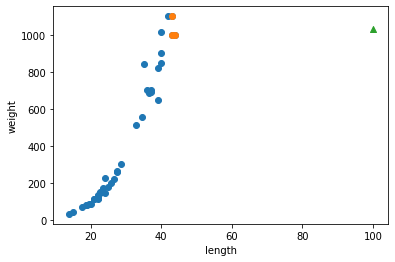

In [9]:
### 산점도 시각화하기
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes])
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter(100,1033,marker = "^")

## 선형회귀(Linear Regression)
##### - 많이 사용되는 대표적인 회귀 알고리즘
##### - 비교적 간단하고, 성능이 뒤어나기 때문에 회귀모델 수행시 초반에 주로 진행합니다.
##### - 선형회귀의 역할 : 하나의 특성을 가장 잘 나타내는 직선을 찾아내는 것이 주 역할
##### - 직선을 '추세선' 이라고 합니다.
##### - 선형회귀 알고리즘 : 1차 방정식(y= ax+b)
##### - 선형회귀 클래스(모델) : LinearRegresin
##### - 사용되는 패키지 : sklearn.linear_model
##### - 직선과 곡선을 일반적으로 선형이라고 한다
##### - 다항회귀는 이차방정식, 다중은 여러개의 항목을 나타낸다(제곱승, 다항의 연속성?)
##### - 굉장히 막강하다 ? 계속 라이브러리 업그레이드 되고 있다

In [10]:
## 선형회귀 클래스(모델) 생성하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [11]:
### 사용 데이터 : train_input, train_target, test_input, test_target
### 예측 데이터 : 길이 50cm

# lr 모델 훈련 > 예측데이터로 예측하기..
lr.fit(train_input,train_target)
lr.predict([[50]])

array([[1241.83860323]])

In [12]:
### 일차방정식의 기울기와 y절편값 확인하기
# 일차 방정식 : y = ax + b
# a : 기울기(coef_)
# b : y절편(intercept_)
print(lr.coef_, lr.intercept_)


[[39.01714496]] [-709.01864495]


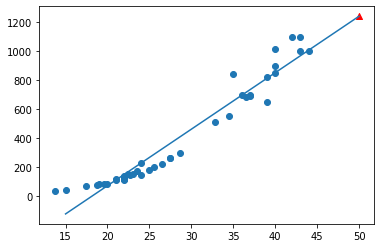

In [15]:
### 추세선을 이용하여 예측데이터 예측가능한지 확인하기
# - 1예측데이터로 사용할 수 있을지 확인
# - 산점도를 이용해서 확인하기
# - 훈련데이터, 예측데이터 산점도로 그리기
import matplotlib.pyplot as plt
plt.scatter(train_input,train_target)
plt.scatter(50,lr.predict([[50]]), marker = "^",c="red")


# 추세선 그리기
# # 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미함
plt.plot([15,50],[float(lr.coef_ * 15 + lr.intercept_),
                 float(lr.coef_ * 50 + lr.intercept_)])
plt.show()

In [18]:
### 훈련데이터와 테스트데이터의 과적합여부 확인하기
# - KNN은 과소적합이 나왔었습니다.
# - LR 모델은 개선이 되었는지 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

##(해석)
# - 테스트 결과가 다소 낮게 나왔으며, 훈련데이터는 높은편
# - 다소 차이는 있으나 우수한 모델로 평가는 할 수 있음
# - 단, 훈련데이터와 테스트데이터의 결정계수의 차이는
#      의심을 해봐야합니다
# 


### 그래프 왼쪽 하단의 산점도 분포가 조금 특이합니다.
# - 약간의 round(곡선)을 뛰고 있습니다.
# - 추세선의 왼쪽 하단으로 직선을 연장 했을 때
# y축 0 이하로 넘어갑니다. 무게는 0보다 작을 수 없습니다.
# 음수를 예측하면 잘못된 모델 입니다.

0.9398463339976041
0.824750312331356


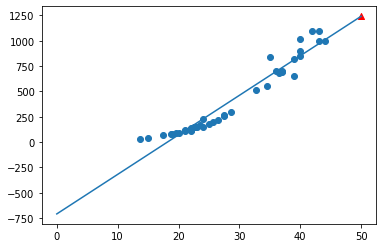

In [19]:
### 추세선을 이용하여 예측데이터 예측가능한지 확인하기
# - 1예측데이터로 사용할 수 있을지 확인
# - 산점도를 이용해서 확인하기
# - 훈련데이터, 예측데이터 산점도로 그리기
import matplotlib.pyplot as plt
plt.scatter(train_input,train_target)
plt.scatter(50,lr.predict([[50]]), marker = "^",c="red")


# 추세선 그리기
# # 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미함
plt.plot([0,50],[float(lr.coef_ * 0 + lr.intercept_),
                 float(lr.coef_ * 50 + lr.intercept_)])
plt.show()

## 다항회귀
##### - 다항식을 사용한 선형회귀를 "다항회귀"라고도 합니다.
##### - 다항(이차방정식) : y=ax2+bx+c
##### - a와b:계수라고 칭합니다.(기울기 포함)
##### - c : y절편

In [56]:
### 훈련데이터 train_input을 [[제곱된값 1개, 원래값 1개], [], []]
### 변수 : train_poly
train_poly = np.column_stack((train_input**2,train_input))
train_poly.shape

(42, 2)

In [57]:
test_poly = np.column_stack((test_input**2,test_input))
test_poly.shape

(14, 2)

[[1573.98423528]]
[[  1.01433211 -21.55792498]] [116.05021078]


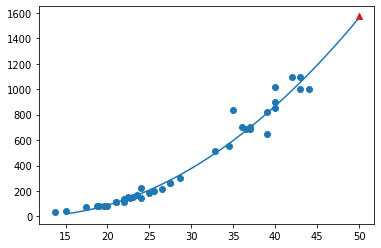

In [72]:
# - 객체(모델) 생성
lr = LinearRegression()

# - 훈련모델 생성
lr.fit(train_poly,train_target)

# - 예측데이터 : 길이 50으로 무게 예측
print(lr.predict([[50**2,50]]))

# - 계수 확인 (coef_, intercept_)
print(lr.coef_, lr.intercept_)

# - 산점도 그리기 : 훈련데이터, 예측데이터, 추세선
plt.scatter(train_input, train_target)
plt.scatter(50,1573.9842,marker="^", c="red")


# 추세선 그리기
point = np.arange(15,51)
plt.plot(point, 1.01*point**2 -21.6 * point + 116.05)
# lr 모델 훈련 > 예측데이터로 예측하기..
plt.show()


In [66]:
np.arange(15,51)

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50])

In [76]:
### 과적합 확인하기... (과대/과소)
print('훈련 = ' , lr.score(train_poly, train_target))
print('테스트 = ' , lr.score(test_poly, test_target))

# 일반적으로 현업에는 쓰는데, 평가받을때나 대학원에서는 못쓴다
# 학문적으로는 인정하지 않는다 훈련이 더 잘나와야 되기 때문이다(연구나,특허)

훈련 =  0.9706807451768623
테스트 =  0.9775935108325122


In [78]:
### (해석)
# 전체적으로 정확도는 낮아졌습니다.
# 그렇지만, 훈련/테스트의 결정계수는 유사하게 가까워졌기에,
# 우수한 모델이라고 할 수 있습니다.

# 다만, 아직 훈련이 테스트보다 낮은 과소적합을 보입니다.

### 그럼 어떻게 ?
# - 복잡도를 줄 수 있는 모델을 찾아야 합니다.
# - KNN에서는 이웃의 개수를 줄였었다 
# - 선형회귀에서는 선인데 ... 항목(특성)이 추가되어야한다.